Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2530 - loss: 1.9791 - val_accuracy: 0.4641 - val_loss: 1.4753
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.4441 - loss: 1.5283 - val_accuracy: 0.5192 - val_loss: 1.3479
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.5037 - loss: 1.3747 - val_accuracy: 0.5831 - val_loss: 1.1671
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.5492 - loss: 1.2681 - val_accuracy: 0.5849 - val_loss: 1.1632
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5832 - loss: 1.1886 - val_accuracy: 0.6198 - val_loss: 1.0773
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6052 - loss: 1.1244 - val_accuracy: 0.6522 - val_loss: 0.9856
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.6242 - loss: 1.0819 - val_accuracy: 0.6571 - val_loss: 0.9826
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6360 - loss: 1.0420 -

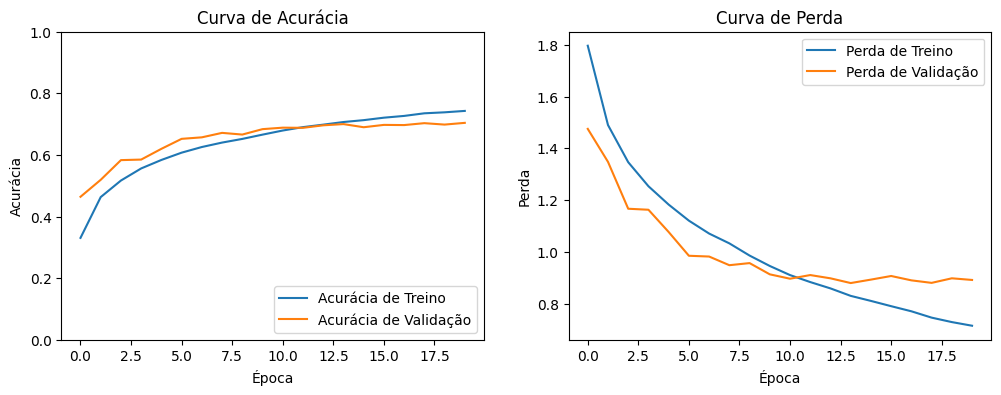

In [ ]:
# reconhecimento de imagens com CIFAR-10

import tensorflow as tf # IA do Google que sabe criar e treinar redes neurais
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt # criar gráficos
import numpy as np # lidar com pixels (grandes listas e grades de números)

# carrega e prepara o CIFAR-10, que já vem dividido em treino e teste; e normaliza (255 -> 255.0); são 50k p treino e 10k ele nunca viu
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data() # bd c 60k imagens coloridas (32x32) em 10 categorias
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# arquitetura CNN (Rede Neural Convolucional); é uma lupa procurando padrões (32) de 3 em 3 pixels (kernel 3x3)
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # encontrou algo relevante, anota
    layers.MaxPooling2D((2, 2)), # guarda somente valores importantes, os máximos

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(), # transformar de 2D para 1D

    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5), # evita um superajuste

    layers.Dense(10) # camada final: um neurônio para cada classe
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) # ajuste de pesos, mapeamento de perdas

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2) # passa 20x pelos dados de treino e 20% serve como um 'simulado'

# acurácia dos testes
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nAcurácia no conjunto de teste: {test_acc:.4f}")


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Curva de Acurácia')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.title('Curva de Perda')

plt.show()

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7511 - loss: 0.6880 - val_accuracy: 0.7078 - val_loss: 0.8988
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7562 - loss: 0.6732 - val_accuracy: 0.6934 - val_loss: 0.9431
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7652 - loss: 0.6563 - val_accuracy: 0.6951 - val_loss: 0.9695
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7664 - loss: 0.6418 - val_accuracy: 0.6999 - val_loss: 0.9810
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7729 - loss: 0.6275 - val_accuracy: 0.7042 - val_loss: 0.9581
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7718 - loss: 0.6226 - val_accuracy: 0.7012 - val_loss: 0.9936
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7831 - loss: 0.5911 - val_accuracy: 0.7038 - val_loss: 0.9729
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7859 - loss: 0.5850 - 

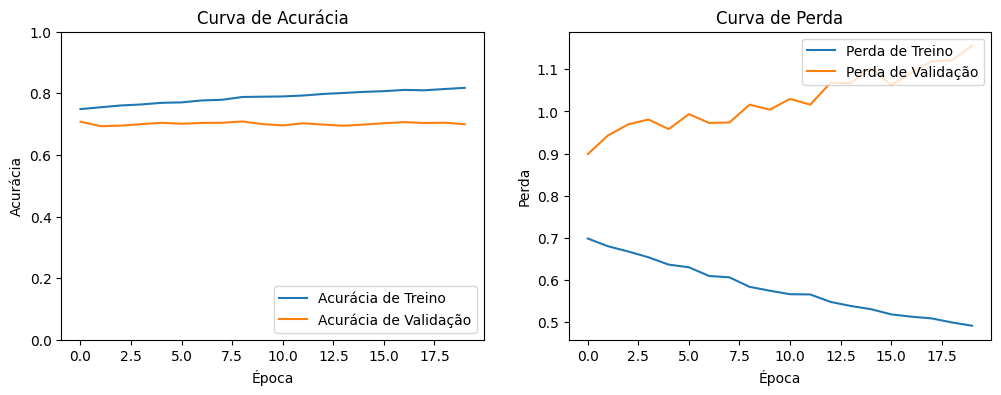

In [ ]:
# aumento de filtros
model_v2 = models.Sequential([
    # primeira camada, agora com 64 filtros
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    # ...
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f"\nAcurácia no conjunto de teste: {test_acc:.4f}")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.title('Curva de Acurácia')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend(loc='upper right')
plt.title('Curva de Perda')

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


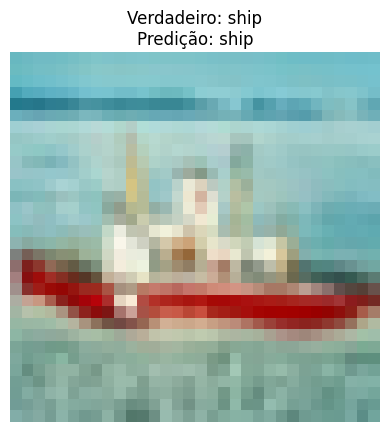

Rótulo Verdadeiro: ship
Predição do Modelo: ship


In [ ]:
# seleciona uma imagem aleatória do conjunto de teste
img_index = np.random.randint(0, test_images.shape[0])
test_image = test_images[img_index]
true_label = test_labels[img_index][0]

# o modelo espera um "batch" de imagens, então adicionamos uma dimensão extra
img_for_prediction = np.expand_dims(test_image, axis=0)

# predição
predictions = model.predict(img_for_prediction)
predicted_label_index = np.argmax(predictions[0])
predicted_class = class_names[predicted_label_index]

# exibe a imagem e o resultado da predição
plt.figure()
plt.imshow(test_image)
plt.title(f"Verdadeiro: {class_names[true_label]}\nPredição: {predicted_class}")
plt.axis('off')
plt.show()

print(f"Rótulo Verdadeiro: {class_names[true_label]}")
print(f"Predição do Modelo: {predicted_class}")